In [38]:
#Import packages for general python function 
import pandas as pd
import numpy as np 
import scipy 
from scipy import stats
from scipy.stats import sem
import random

#Import packages for running glm
import statsmodels as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import mixedlm
from statsmodels.stats.multitest import multipletests


#import packages for graphing 
import matplotlib.pyplot as plt



In [16]:
'''
ANALYSIS PLAN:
1. make a dataframe containing any possible relevant information regarding decoding (accuracy, time, classifier, condition)
2. make a list of all the peak decoding accuracies 
3. analyze whether the peak decoding accuracies are significantly different from zero (There should be a peak in decoding accuracy, which is what I am interested in analyzing)
4. use a linear mixed model to determine whether the peak decoding accuracies changes depending on classifier type and condition. 
    a.) If it is not significantly different between conditions, then minute changes in the brain do send enough information to the whole brain to decode it as well as larger changes. This would suggest that we can study processes with minute changes.
    b.) If there is a significant difference in decoding accuracy between conditions, then there is significantly less information avaliable in the whole brain signal regarding minute versus large changes. This would suggest that we may not 
        be able to study processes with minute changes.
'''

'\nANALYSIS PLAN:\n1. make a dataframe containing any possible relevant information regarding decoding (accuracy, time, classifier, condition)\n2. make a list of all the peak decoding accuracies \n3. analyze whether the peak decoding accuracies are significantly different from zero (There should be a peak in decoding accuracy, which is what I am interested in analyzing)\n4. use a linear mixed model to determine whether the peak decoding accuracies changes depending on classifier type and condition. \n    a.) If it is not significantly different between conditions, then minute changes in the brain do send enough information to the whole brain to decode it as well as larger changes. This would suggest that we can study processes with minute changes.\n    b.) If there is a significant difference in decoding accuracy between conditions, then there is significantly less information avaliable in the whole brain signal regarding minute versus large changes. This would suggest that we may not 

In [31]:
#Make dataframe containing all the necessary values (subjects, decoding accuracy, time, classifier, cond)
#Define subjects 
subjects = [1,2,3,5,10,16,17,21,34]
#Define dataframe
df = pd.DataFrame(columns=['subject','accuracy','time','classifier','condition'])
#Define the input path
baseDir = '/projectsn/f_mc1689_1/cpro2_eeg/'
inputDir_base = f'{baseDir}data/results/DynamicDecoding/'#RawOrSource/classifier/cond
#Define directory input lists
dataType = 'RawSensor'
classifier = ['LDA','SVM','Random_Forest']
conds = ['Hand', 'Right','Left']#add ,'Right','Left'
peakAcc = [] #Make an empty list to add peak decoding accuracies to

#Loop through conditions to make directory
for clasCond in classifier:
    for cond in conds:
        for subjNum in subjects:
            # 10_SubjectDecoding_10fold_Right_correctOnly_noPseudoTrials.csv
            inputPrefix = f'_SubjectDecoding_10fold_{cond}_correctOnly_noPseudoTrials.csv'
            path = f'{inputDir_base}{dataType}/{clasCond}/{cond}/DecodingAccuracy/{subjNum}{inputPrefix}'
            acc = pd.read_csv(f'{path}')
            a = np.array(acc)
            a_max = max(a)
            peakAcc.append(a_max) #Check a shape
            t = np.linspace(-0.09,3.855,(acc.shape[0]))
            newRow = pd.DataFrame({'subject': [subjNum], 'accuracy':a_max,'time':t[ind],'classifier':[clasCond],'condition':[cond]})
            df = pd.concat([df, newRow], ignore_index=True)


In [32]:
#Determine whether the peak of each decoding timeseries accuracy is significantly different from 50%
chance = .50
tStat_all, p_all = stats.ttest_1samp(peakAcc, chance)
print(f'T Statistic: {tStat_all}\np-value: {p_all}\nmean: {np.mean(peakAcc)}')
if p_all<0.05: print('As the p-value is less than 0.05, we find significant\nevidence that the decoding accuracy across conditions\nis not due to chance, and that learning did occur.\n')

#Determine whether the peak of each classifier decoding timeseries accuracy is significantly different from 50%
peakLDA = list(df[(df['classifier'] == 'LDA')]['accuracy'])
tStat_lda, p_lda = stats.ttest_1samp(peakLDA, chance)
print(f'T Statistic: {tStat_lda}\np-value: {p_lda}\nmean: {np.mean(peakLDA)}')
if p_lda<0.05: print('As the p-value is less than 0.05, we find significant\nevidence that LDA decoding accuracy across conditions\nis not due to chance, and that learning did occur.\n')

peakSVM = list(df[(df['classifier'] == 'SVM')]['accuracy'])
tStat_SVM, p_SVM = stats.ttest_1samp(peakSVM, chance)
print(f'T Statistic: {tStat_SVM}\np-value: {p_SVM}\nmean: {np.mean(peakSVM)}')
if p_SVM<0.05: print('As the p-value is less than 0.05, we find significant\nevidence that SVM decoding accuracy across conditions\nis not due to chance, and that learning did occur.\n')

peakRF = list(df[(df['classifier'] == 'Random_Forest')]['accuracy'])
tStat_RF, p_RF = stats.ttest_1samp(peakRF, chance)
print(f'T Statistic: {tStat_RF}\np-value: {p_RF}\nmean: {np.mean(peakRF)}')
if p_RF<0.05: print('As the p-value is less than 0.05, we find significant\nevidence that RF decoding accuracy across conditions\nis not due to chance, and that learning did occur.\n')

#Determine whether the peak of each condition decoding timeseries accuracy is significantly different from 50%
peakHand = list(df[(df['condition'] == 'Hand')]['accuracy'])
tStat_Hand, p_Hand = stats.ttest_1samp(peakHand, chance)
print(f'T Statistic: {tStat_Hand}\np-value: {p_Hand}\nmean: {np.mean(peakHand)}')
if p_Hand<0.05: print('As the p-value is less than 0.05, we find significant\nevidence that decoding accuracy of hands\nis not due to chance, and that learning did occur.\n')

peakLeft = list(df[(df['condition'] == 'Left')]['accuracy'])
tStat_Left, p_Left = stats.ttest_1samp(peakLeft, chance)
print(f'T Statistic: {tStat_Left}\np-value: {p_Left}\nmean: {np.mean(peakLeft)}')
if p_Left<0.05: print('As the p-value is less than 0.05, we find significant\nevidence that finger decoding accuracy of the left hand\nis not due to chance, and that learning did occur.\n')

peakRight = list(df[(df['condition'] == 'Right')]['accuracy'])
tStat_Right, p_Right = stats.ttest_1samp(peakRight, chance)
print(f'T Statistic: {tStat_Right}\np-value: {p_Right}\nmean: {np.mean(peakRight)}')
if p_Right<0.05: print('As the p-value is less than 0.05, we find significant\nevidence that finger decoding accuracy of the right hand\nis not due to chance, and that learning did occur.\n')


T Statistic: [27.84605122]
p-value: [6.40607924e-43]
mean: 0.7115735209880091
As the p-value is less than 0.05, we find significant
evidence that the decoding accuracy across conditions
is not due to chance, and that learning did occur.

T Statistic: 15.995155669348085
p-value: 5.6787271035416175e-15
mean: 0.7168743450932994
As the p-value is less than 0.05, we find significant
evidence that LDA decoding accuracy across conditions
is not due to chance, and that learning did occur.

T Statistic: 16.447900078364018
p-value: 2.9269950304334098e-15
mean: 0.7158243357344665
As the p-value is less than 0.05, we find significant
evidence that SVM decoding accuracy across conditions
is not due to chance, and that learning did occur.

T Statistic: 15.42280245901568
p-value: 1.3423336852563325e-14
mean: 0.7020218821362614
As the p-value is less than 0.05, we find significant
evidence that RF decoding accuracy across conditions
is not due to chance, and that learning did occur.

T Statistic: 32.5

In [34]:
#Use a linear mixed model to determine wehther classifier type or condition impacts accuracy decoding
#Fit linear mixed model with random intercepts per subjects 
#will be treating time as a categorical variable because I am not expecting a linear increase in decoding accuracy. This is to find "peaks" in the accuracy.
df['time_cat'] = df['time'].astype(str) 
model = mixedlm("accuracy ~ C(time_cat) + classifier + condition + C(time_cat):condition + classifier:condition", df, groups=df["subject"])
result = model.fit()
pvals = result.pvalues
reject, pvals_corrected, _, _ = multipletests(pvals, method='fdr_bh')
# Print model summary
#print(result.summary())

# Print all significant terms
print("\nSignificant terms after FDR correction:")
for i, is_sig in enumerate(reject):
    if is_sig:
        term = pvals.index[i]
        pval_corr = pvals_corrected[i]
        if term !='Intercept':
            print(f"The {term} interaction was significantly different from the reference level with FDR-corrected p = {pval_corr:.4f}")
#These results mixed with those of the t-tests/graphs below values imply that there was a significant difference in accuracy decoding
## between finger and hand level, however, it appears as though finger decoding was greater than that of hand decoding. There were no 
## significant differences between Decoder types, implying that it does not matter which one was used to decode movements. 



Significant terms after FDR correction:
The condition[T.Left] interaction was significantly different from the reference level with FDR-corrected p = 0.0022
The condition[T.Right] interaction was significantly different from the reference level with FDR-corrected p = 0.0002


/home/let83/eeg_decoding_env/lib64/python3.6/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


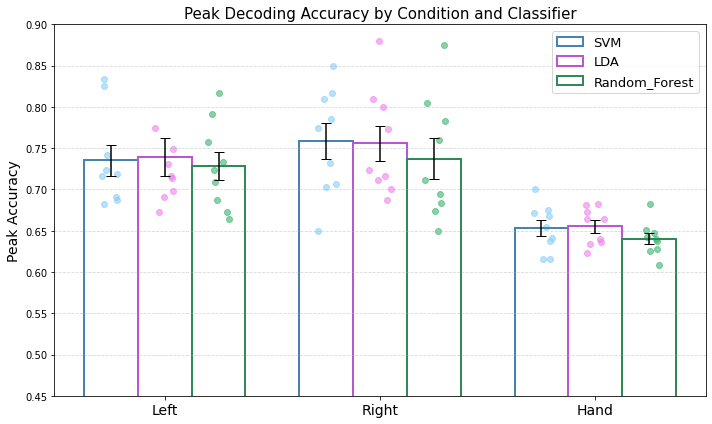

In [41]:
#Graph Condition Results 
xlabels = ['Left', 'Right', 'Hand']
xpos = np.arange(len(xlabels))  # 0, 1, 2 for Left, Right, Hand

width = 0.25  # width of each bar
offsets = [-width, 0, width]  # SVM, LDA, Random Forest
classifiers = ['SVM', 'LDA', 'Random_Forest']
edgecolors = ['steelblue', 'mediumorchid', 'seagreen']
scattercolors = ['lightskyblue', 'violet', 'mediumseagreen']

plt.figure(figsize=(10, 6))

for idx, (classifier, offset, edgecolor, scattercolor) in enumerate(zip(classifiers, offsets, edgecolors, scattercolors)):
    # Extract data
    peaksLeft = df[(df['condition'] == 'Left') & (df['classifier'] == classifier)]['accuracy'].values
    peaksRight = df[(df['condition'] == 'Right') & (df['classifier'] == classifier)]['accuracy'].values
    peaksHand = df[(df['condition'] == 'Hand') & (df['classifier'] == classifier)]['accuracy'].values
    peaksConds = [np.mean(peaksLeft), np.mean(peaksRight), np.mean(peaksHand)]
    peaksCondsSEM = [sem(peaksLeft), sem(peaksRight), sem(peaksHand)]

    # Plot bars with offset
    bar_positions = xpos + offset
    plt.bar(bar_positions, peaksConds, yerr=peaksCondsSEM, capsize=5, width=width,
            edgecolor=edgecolor, facecolor='none', linewidth=2, label=classifier)

    # Overlay individual subject points
    for j, condition_data in enumerate([peaksLeft, peaksRight, peaksHand]):
        jittered_x = [xpos[j] + offset + random.uniform(-0.05, 0.05) for _ in range(len(condition_data))]
        plt.scatter(jittered_x, condition_data, color=scattercolor, alpha=0.6)

plt.xticks(xpos, xlabels, fontsize=14)
plt.ylabel('Peak Accuracy', fontsize=14)
plt.title('Peak Decoding Accuracy by Condition and Classifier', fontsize=15)
plt.ylim(0.45, 0.9)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(fontsize=13)
plt.show()